      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


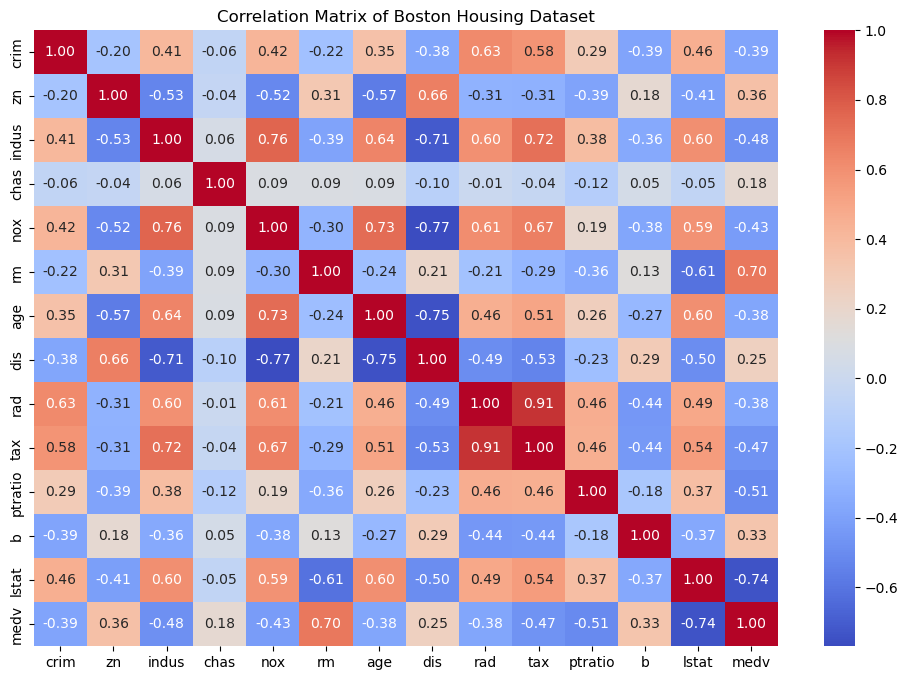

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 下載數據集
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# 查看數據結構
print(boston.head())

# 計算相關性矩陣
correlation_matrix = boston.corr()

# 繪製熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.show()


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


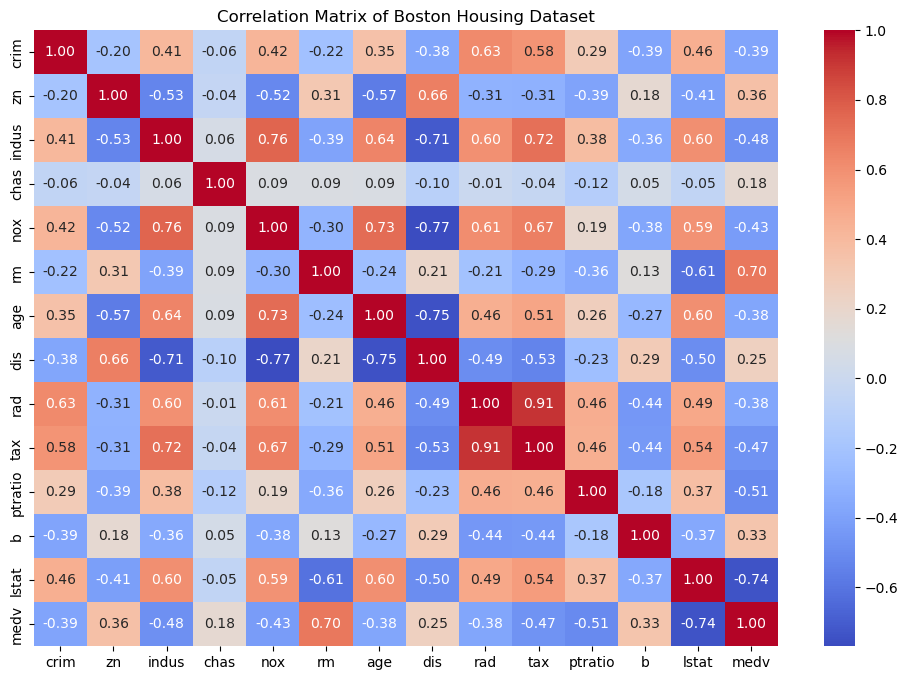

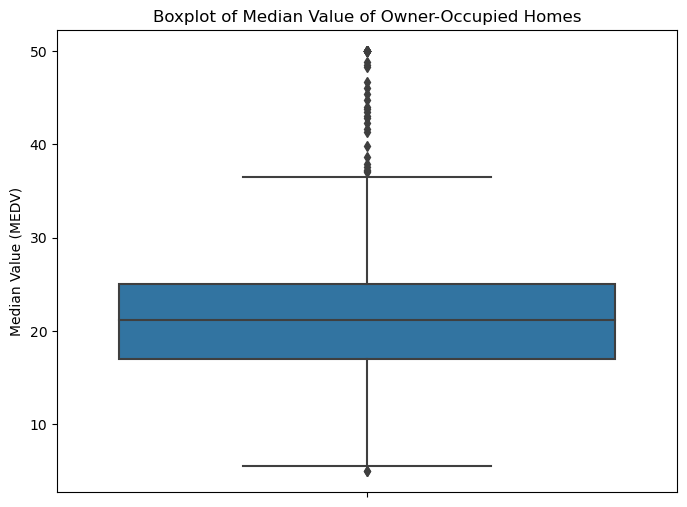

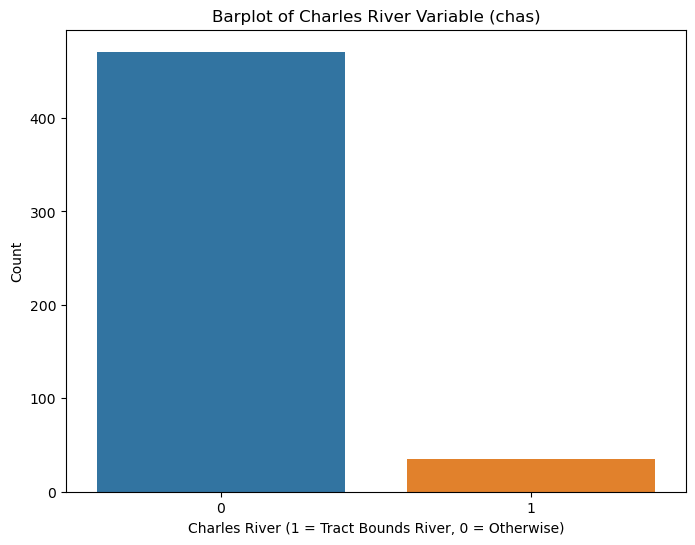

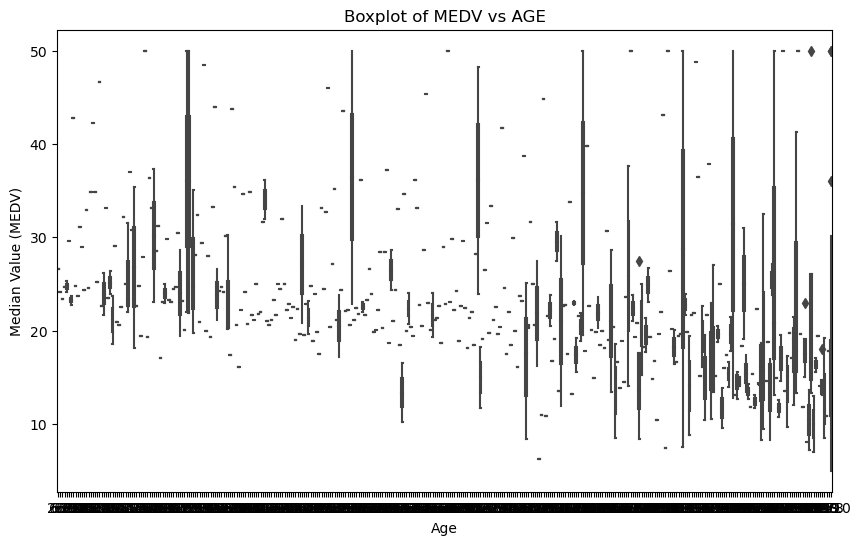

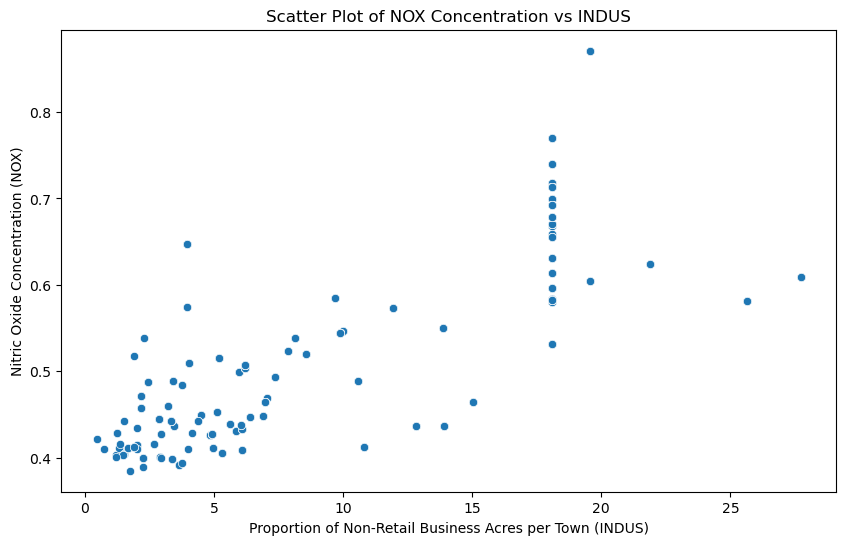

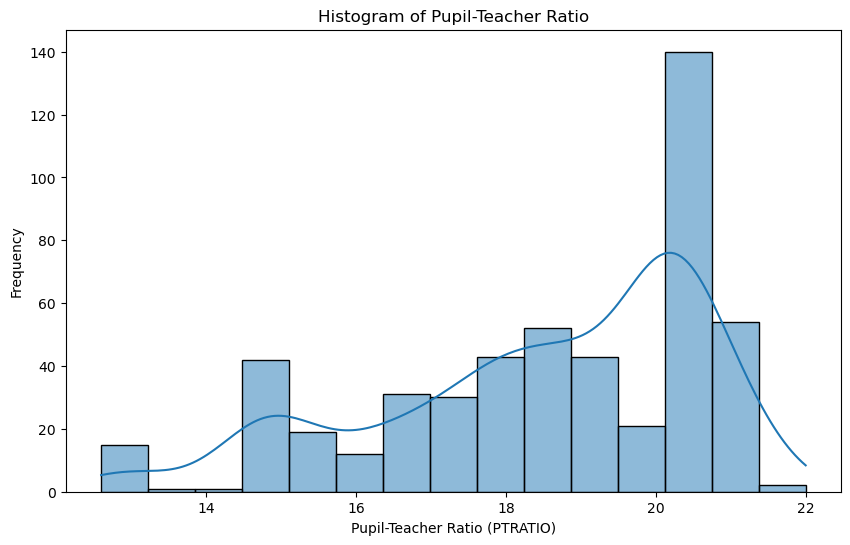

Conclusion 1: There is a strong positive correlation between NOX and INDUS as seen in the scatter plot.
Conclusion 2: The boxplot shows significant differences in MEDV for different CHAS values.
Conclusion 3: The histogram suggests PTRATIO might impact MEDV significantly.
Coefficient: 1.0916130158411093
Explanation: An increase of one unit in the weighted distance to Boston's employment centers is associated with a decrease of 1.09 in the median value of owner-occupied homes.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 下載數據集
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# 查看數據結構
print(boston.head())

# 計算相關性矩陣
correlation_matrix = boston.corr()

# 繪製熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.show()

# 1. 自住屋中位數價值 (MEDV) 的箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston, y='medv')
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value (MEDV)")
plt.show()

# 2. Charles 河變數 (chas) 的條形圖
plt.figure(figsize=(8, 6))
sns.countplot(data=boston, x='chas')
plt.title("Barplot of Charles River Variable (chas)")
plt.xlabel("Charles River (1 = Tract Bounds River, 0 = Otherwise)")
plt.ylabel("Count")
plt.show()

# 3. 自住屋中位數 (MEDV) 與年齡 (AGE) 的箱線圖
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston, x='age', y='medv')
plt.title("Boxplot of MEDV vs AGE")
plt.xlabel("Age")
plt.ylabel("Median Value (MEDV)")
plt.show()

# 4. 一氧化氮濃度 (nox) 與每個城鎮非零售商業區比例 (indus) 的散點圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston, x='indus', y='nox')
plt.title("Scatter Plot of NOX Concentration vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

# 5. 學生與教師比例 (ptratio) 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(data=boston, x='ptratio', bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Frequency")
plt.show()

# 6. 陳述虛無假設與替代假設
# Null Hypothesis 1: There is no correlation between NOX and INDUS.
# Alternate Hypothesis 1: There is a significant correlation between NOX and INDUS.

# Null Hypothesis 2: There is no significant difference in MEDV based on the CHAS variable.
# Alternate Hypothesis 2: There is a significant difference in MEDV based on the CHAS variable.

# Null Hypothesis 3: There is no significant correlation between PTRATIO and MEDV.
# Alternate Hypothesis 3: There is a significant correlation between PTRATIO and MEDV.

# 7. 提供結論
print("Conclusion 1: There is a strong positive correlation between NOX and INDUS as seen in the scatter plot.")
print("Conclusion 2: The boxplot shows significant differences in MEDV for different CHAS values.")
print("Conclusion 3: The histogram suggests PTRATIO might impact MEDV significantly.")

# 8. 加權距離對自住屋中位數價值的係數與解釋
from sklearn.linear_model import LinearRegression

# 構建模型
X = boston[['dis']]  # 加權距離
y = boston['medv']  # 中位數房價
model = LinearRegression()
model.fit(X, y)

# 提取係數與截距
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient: {coef}")
print(f"Explanation: An increase of one unit in the weighted distance to Boston's employment centers is associated with a decrease of {coef:.2f} in the median value of owner-occupied homes.")

# 9. 圖表標題與標籤
# 已經在所有圖表中提供標題與標籤
